## KMeans Clustering Analysis for TB occurences


#### I have used to number of clusters 
#### 1) As optimal Cluster - 3 using elbow method, Chart in two dimesion shows that clusters are properly separated However Silhouette score is 67%. Countries are clusted based on Low(99 Countries), Medium(36 Countries) and High(13 Countries). 
#### 2) As optimal Cluster - 2 , Silhouette score is 71.4%

In [128]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

#### Loading the data set and shows the top values of the Dataset

In [183]:
df=pd.read_csv("C:\\Users\\Vijayaraghavan\\Downloads\\DataSceince_Exercise\\Assignments\\Dataset.csv")
df.head()

,TB,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Djibouti,1485,1477,1463,1442,1414,1381,720,669,698,701,761,775,932,960,1034,1046,1093,1104
1,Kiribati,1026,1006,986,966,947,928,910,853,571,556,546,607,587,477,439,419,405,423
2,Bhutan,924,862,804,750,699,651,620,597,551,538,515,512,472,460,443,412,406,363
3,Philippines,799,783,766,750,735,719,705,689,669,649,600,578,561,542,534,520,505,500
4,Timor-Leste,706,694,681,669,656,644,644,644,644,644,644,644,345,359,367,370,385,378


#### There are no missing values in the dataset

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 19 columns):
TB      150 non-null object
1990    150 non-null int64
1991    150 non-null int64
1992    150 non-null int64
1993    150 non-null int64
1994    150 non-null int64
1995    150 non-null int64
1996    150 non-null int64
1997    150 non-null int64
1998    150 non-null int64
1999    150 non-null int64
2000    150 non-null int64
2001    150 non-null int64
2002    150 non-null int64
2003    150 non-null int64
2004    150 non-null int64
2005    150 non-null int64
2006    150 non-null int64
2007    150 non-null int64
dtypes: int64(18), object(1)
memory usage: 22.4+ KB


### In Data Preprocessing, There are two outliers which has more than 1000, Its been removed from the dataset as per the boxplot which is shown below based on the countries

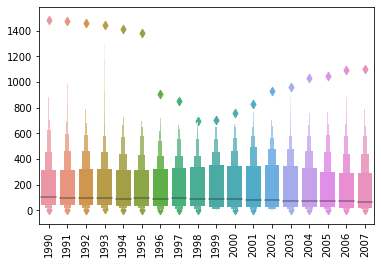

In [178]:
sns.boxenplot(data=df[['1990', '1991', '1992', '1993', '1994','1995', '1996', '1997','1998', '1999', '2000',
       '2001', '2002','2003','2004','2005','2006','2007']])
x = plt.gca().xaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(90)

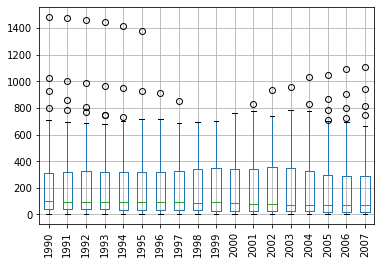

In [185]:
tdf = df.set_index('TB')
tdf.boxplot()

x = plt.gca().xaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(90)
plt.show()

In [186]:
df.drop(df.index[[0,1]],inplace=True)

In [201]:
TB_df=df.drop(columns="TB")
TB_df

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
2,924,862,804,750,699,651,620,597,551,538,515,512,472,460,443,412,406,363
3,799,783,766,750,735,719,705,689,669,649,600,578,561,542,534,520,505,500
4,706,694,681,669,656,644,644,644,644,644,644,644,345,359,367,370,385,378
5,702,687,668,647,628,614,613,658,637,647,656,669,701,693,702,713,726,750
6,650,685,687,683,671,658,387,395,411,442,481,506,544,560,572,570,556,532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,8,8,7,7,6,6,6,6,5,5,5,4,4,4,4,4,3,3
146,8,8,8,7,7,6,6,6,6,5,5,5,5,5,4,4,4,4
147,7,7,7,7,6,6,6,5,5,4,4,4,4,4,3,3,3,3
148,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6


### Standardization

In [202]:
std = StandardScaler()
Std_arr=std.fit_transform(TB_df)
std_df=pd.DataFrame(Std_arr)
std_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,3.711315,3.444108,3.215240,3.003847,2.788825,2.553708,2.494118,2.300523,2.044170,1.864302,1.723175,1.652285,1.470779,1.379758,1.311925,1.176045,1.164767,0.960031
1,3.083727,3.042499,3.018565,3.003847,2.981642,2.921210,2.970479,2.805780,2.689950,2.443729,2.158040,1.979440,1.917246,1.779699,1.757033,1.704372,1.651802,1.630773
2,2.616802,2.590054,2.578634,2.576534,2.558516,2.515877,2.628620,2.558644,2.553132,2.417629,2.383146,2.306594,0.833686,0.887147,0.940186,0.970584,1.061457,1.033470
3,2.596719,2.554468,2.511350,2.460473,2.408547,2.353743,2.454888,2.635531,2.514823,2.433289,2.444538,2.430517,2.619554,2.516176,2.578770,2.648514,2.739020,2.854755
4,2.335643,2.544301,2.609688,2.650390,2.638856,2.591539,1.188328,1.191154,1.277990,1.363176,1.549230,1.622544,1.831966,1.867491,1.942902,1.948969,1.902698,1.787443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,-0.887646,-0.897334,-0.909762,-0.915829,-0.922901,-0.932156,-0.946891,-0.945205,-0.943932,-0.917990,-0.886010,-0.865814,-0.876936,-0.844306,-0.835354,-0.819860,-0.817807,-0.802502
144,-0.887646,-0.897334,-0.904587,-0.915829,-0.917545,-0.932156,-0.946891,-0.945205,-0.938459,-0.917990,-0.886010,-0.860858,-0.871919,-0.839429,-0.835354,-0.819860,-0.812887,-0.797606
145,-0.892667,-0.902418,-0.909762,-0.915829,-0.922901,-0.932156,-0.946891,-0.950697,-0.943932,-0.923210,-0.891126,-0.865814,-0.876936,-0.844306,-0.840245,-0.824752,-0.817807,-0.802502
146,-0.892667,-0.902418,-0.909762,-0.915829,-0.917545,-0.926752,-0.941287,-0.939713,-0.938459,-0.912770,-0.880894,-0.855901,-0.866903,-0.834551,-0.825571,-0.810076,-0.803048,-0.787814


In [203]:
std_df.columns=['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007']

#### Determine the optiam cluster using the elbow method. To get the values used in the graph, we train the models using a different number of clusters and compute the value of intertia (Within the sum of squares)

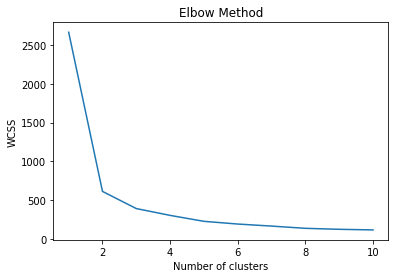

In [205]:
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=600, n_init=10, random_state=0)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### we found out the optimal cluster is mostly 3 using the elbow method

### we can feed the optimal clusters as 3 in to Kmeans and init giving as Kmeans to not to select the randomized clusters and Below is the chart and silhouetter score is based on optimal cluster 3

In [225]:
model = KMeans(n_clusters=3, init='k-means++', max_iter=600, n_init=10, random_state=123).fit(std_df)

In [226]:
predicted=model.labels_
centroids = model.cluster_centers_

print ("Predicted clusters to points: ", predicted)
print ("Location of centroids: ")
print (centroids)

Predicted clusters to points:  [2 2 2 2 2 2 2 2 1 1 1 2 2 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 0 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Location of centroids: 
[[-5.89497713e-01 -5.98065756e-01 -6.02986881e-01 -6.12409560e-01
  -6.21881762e-01 -6.24703818e-01 -6.25354203e-01 -6.22290838e-01
  -6.26404234e-01 -6.34683024e-01 -6.34703361e-01 -6.25129930e-01
  -6.17548015e-01 -6.26156056e-01 -6.19148804e-01 -6.13559077e-01
  -6.08502892e-01 -6.03598604e-01  3.33066907e-16]
 [ 8.47702922e-01  8.70507285e-01  8.83891947e-01  9.07139684e-01
   9.31474132e-01  9.39281204e-01  9.50614473e-01  9.42797119e-01
   9.54491408e-01  9.91392134e-01  9.75095247e-01  9.47029997e-01
   9.86548939e-01  1.02154490e+00  1.00771335e+00  9.82542029e-01
   9.65936029e-01  9.61663460e-01  1.00000000e+00]
 [ 2.14176680e

In [227]:
std_df['predicted'] = predicted
std_df.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,predicted
0,3.711315,3.444108,3.215240,3.003847,2.788825,2.553708,2.494118,2.300523,2.044170,1.864302,1.723175,1.652285,1.470779,1.379758,1.311925,1.176045,1.164767,0.960031,2
1,3.083727,3.042499,3.018565,3.003847,2.981642,2.921210,2.970479,2.805780,2.689950,2.443729,2.158040,1.979440,1.917246,1.779699,1.757033,1.704372,1.651802,1.630773,2
2,2.616802,2.590054,2.578634,2.576534,2.558516,2.515877,2.628620,2.558644,2.553132,2.417629,2.383146,2.306594,0.833686,0.887147,0.940186,0.970584,1.061457,1.033470,2
3,2.596719,2.554468,2.511350,2.460473,2.408547,2.353743,2.454888,2.635531,2.514823,2.433289,2.444538,2.430517,2.619554,2.516176,2.578770,2.648514,2.739020,2.854755,2
4,2.335643,2.544301,2.609688,2.650390,2.638856,2.591539,1.188328,1.191154,1.277990,1.363176,1.549230,1.622544,1.831966,1.867491,1.942902,1.948969,1.902698,1.787443,2


In [228]:
df['predicted'] = predicted
df.to_csv("C:\\Users\\Vijayaraghavan\\Downloads\\DataSceince_Exercise\\Assignments\\Dataset_predicted.csv")

###### HIghly TB Occrence Countries

In [244]:
# Highly TB Occurence Countries
high_tb=df.loc[df['predicted'] == 2]
high_tb

,TB,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,predicted
2,Bhutan,924,862,804,750,699,651,620,597,551,538,515,512,472,460,443,412,406,363,2
3,Philippines,799,783,766,750,735,719,705,689,669,649,600,578,561,542,534,520,505,500,2
4,Timor-Leste,706,694,681,669,656,644,644,644,644,644,644,644,345,359,367,370,385,378,2
5,Togo,702,687,668,647,628,614,613,658,637,647,656,669,701,693,702,713,726,750,2
6,Namibia,650,685,687,683,671,658,387,395,411,442,481,506,544,560,572,570,556,532,2
7,Mali,640,631,621,609,597,583,573,566,565,567,571,573,572,578,584,589,593,599,2
8,Bangladesh,639,623,608,594,579,576,550,535,516,492,500,491,478,458,444,416,392,387,2
9,Swaziland,629,590,527,477,448,441,460,504,556,647,740,832,693,739,776,788,801,812,2
13,Mauritania,585,587,590,592,594,595,622,615,612,615,619,624,632,642,494,565,556,559,2
14,Papua New Guinea,498,498,497,497,496,496,494,493,491,489,486,482,477,471,463,453,441,430,2


### Medium TB OCcurence Countries

In [245]:
med_tb=df.loc[df['predicted'] == 1]
med_tb


,TB,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,predicted
10,Solomon Islands,625,593,563,534,506,480,380,354,339,322,300,286,277,254,229,204,197,180,1
11,Tuvalu,593,573,554,535,518,500,484,467,452,437,422,408,394,381,368,245,261,203,1
12,India,586,577,566,555,542,525,517,501,487,476,443,411,389,349,311,299,290,283,1
15,Haiti,479,464,453,443,435,429,428,426,417,407,403,397,388,380,377,368,368,366,1
16,Mongolia,477,477,477,477,477,477,333,342,307,281,297,273,258,258,233,232,217,234,1
17,Liberia,476,473,469,465,462,461,418,424,396,403,435,437,382,429,370,416,393,398,1
19,Cape Verde,449,438,428,418,408,398,394,391,387,384,380,283,374,370,367,278,285,280,1
20,Indonesia,443,430,417,404,392,380,369,359,348,335,326,314,297,287,274,261,251,244,1
22,Pakistan,430,428,427,426,424,422,421,421,415,420,413,406,376,355,333,289,260,223,1
23,Laos,428,424,420,415,411,407,373,360,352,344,344,337,330,324,313,298,291,289,1


### Low TB Occurence Countries

In [246]:
low_tb=df.loc[df['predicted'] == 0]
low_tb

,TB,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,predicted
42,"Micronesia, Fed. Sts.",263,253,244,234,225,217,204,287,276,265,173,171,152,142,128,124,112,100,0
44,Eritrea,245,245,242,239,235,232,232,225,203,114,114,111,118,110,122,127,133,134,0
51,Comoros,188,177,167,157,148,140,130,155,120,143,112,103,104,107,99,91,86,83,0
52,Cameroon,188,199,200,199,197,197,196,207,212,219,228,241,240,227,228,213,201,195,0
53,Dominican Republic,183,173,164,156,148,141,135,132,128,122,119,115,102,93,90,85,84,82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Barbados,8,8,7,7,6,6,6,6,5,5,5,4,4,4,4,4,3,3,0
146,Norway,8,8,8,7,7,6,6,6,6,5,5,5,5,5,4,4,4,4,0
147,United States of America,7,7,7,7,6,6,6,5,5,4,4,4,4,4,3,3,3,3,0
148,Australia,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,0


### Below chart is to plot the two dimension view of Centroid formation

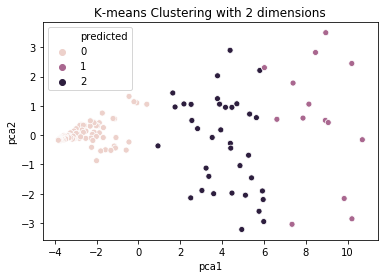

In [209]:
reduced_data = PCA(n_components=2).fit_transform(std_df)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=std_df['predicted'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [210]:
score = silhouette_score(std_df, predicted, metric='euclidean')
score

0.6740708842862076

### Below chart and silhouette score is based on the optimal cluster is 2

In [211]:
model1 = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=123).fit(std_df)

In [212]:
predicted=model1.labels_
centroids = model.cluster_centers_

print ("Predicted clusters to points: ", predicted)
print ("Location of centroids: ")
print (centroids)

Predicted clusters to points:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Location of centroids: 
[[-0.59567708 -0.60491994 -0.6100494  -0.61964906 -0.62924892 -0.63209969
  -0.6329386  -0.63025985 -0.63472386 -0.64319104 -0.64378063 -0.63466154
  -0.62698171 -0.63502846 -0.62812273 -0.62188674 -0.61630661 -0.611161  ]
 [ 2.13266334  2.13325097  2.13278741  2.13904626  2.14151104  2.13602163
   2.11463039  2.10281393  2.09616031  2.04886864  2.07764455  2.06760161
   1.90542161  1.86087194  1.83459461  1.85672093  1.86158501  1.83605248]
 [ 0.7921963   0.8171289   0.83127272  0.85497112  0.88014554  0.89004075
   0.90064325  0.89794639  0.91268596  0.9541267   0.94454106  0.92362247
   0.96578627  1.00501616  0.9964362   0.97085577 

In [213]:
std_df['predicted'] = predicted
std_df.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,predicted
0,3.711315,3.444108,3.215240,3.003847,2.788825,2.553708,2.494118,2.300523,2.044170,1.864302,1.723175,1.652285,1.470779,1.379758,1.311925,1.176045,1.164767,0.960031,1
1,3.083727,3.042499,3.018565,3.003847,2.981642,2.921210,2.970479,2.805780,2.689950,2.443729,2.158040,1.979440,1.917246,1.779699,1.757033,1.704372,1.651802,1.630773,1
2,2.616802,2.590054,2.578634,2.576534,2.558516,2.515877,2.628620,2.558644,2.553132,2.417629,2.383146,2.306594,0.833686,0.887147,0.940186,0.970584,1.061457,1.033470,1
3,2.596719,2.554468,2.511350,2.460473,2.408547,2.353743,2.454888,2.635531,2.514823,2.433289,2.444538,2.430517,2.619554,2.516176,2.578770,2.648514,2.739020,2.854755,1
4,2.335643,2.544301,2.609688,2.650390,2.638856,2.591539,1.188328,1.191154,1.277990,1.363176,1.549230,1.622544,1.831966,1.867491,1.942902,1.948969,1.902698,1.787443,1


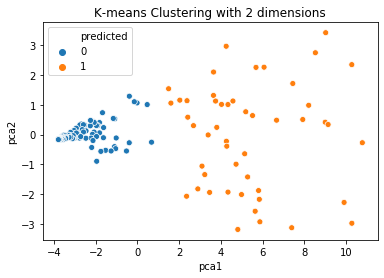

In [214]:
reduced_data = PCA(n_components=2).fit_transform(std_df)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=std_df['predicted'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [215]:
score = silhouette_score(std_df, predicted, metric='euclidean')
score

0.7140920814074605